In [ ]:
%install-location $cwd/swift-install
%install '.package(path: "$cwd/FastaiNotebook_00_load_data")' FastaiNotebook_00_load_data

Installing packages:
	.package(path: "/home/ubuntu/dev_swift/FastaiNotebook_00_load_data")
		FastaiNotebook_00_load_data
With SwiftPM flags: []
Working in: /tmp/tmp1dgpn_ka/swift-install
Updating https://github.com/JustHTTP/Just
Updating https://github.com/latenitesoft/NotebookExport
Updating https://github.com/mxcl/Path.swift
Completed resolution in 1.30s
Compile Swift Module 'FastaiNotebook_00_load_data' (1 sources)
Compile Swift Module 'jupyterInstalledPackages' (1 sources)
Linking ./.build/x86_64-unknown-linux/debug/libjupyterInstalledPackages.so
Initializing Swift...
Installation complete!


In [ ]:
import FastaiNotebook_00_load_data

# Hello Swift

### Constants, variables and types

The first thing you'll notice about Swift is that it has variables (`var`) and constants (`let`).

In [ ]:
// These are integers
let batchSize = 6
var b = 1 + (4 * batchSize)
print("some integers:", batchSize, b)

some integers: 6 25


In [ ]:
// These are floating point values.
var myPi = 3.1
let π    = Float.pi
print("some floats: ", myPi, π)

some floats:  3.1 3.1415925


Constants cannot be changed after they are set:

In [ ]:
batchSize = 8

: 

Swift also has types... and type inference.  This means you often don't have to specify the types, but they are there, and can be used to override type inference:


In [ ]:
// Type inference would produce an integer, but we make this be a float.
var someFloat : Float = 1 + 4*9

// Jeremy might not like greek letters, but he surely loves emoji 😬
var 🐶💩 = "dog poo"
print(🐶💩)


// This is the equivalent of the Python 'type' operator.
print("some types: ", type(of: someFloat), type(of: 🐶💩))

dog poo
some types:  Float String


### Whitespace, functions, tuples, and structs in Swift 

Functions are declare with `func` instead of `def` in Swift.  They include types, and default to having argument labels.

In [ ]:
func distance(x: Float, y: Float) -> Float {
    return sqrt(x*x+y*y)
}

// Functions default to having argument labels:
distance(x: 1.0, y: 2.0)

2.236068


Sometimes argument labels are the wrong thing, and sometimes you want the caller to use a different argument label than you want to use as the name inside of a function.  To support this, Swift allows you to use two names for each argument, and the underscore means "ignore".

Swift also has tuples just like Python, and you can use them to return multiple results:

In [ ]:
func sincos(_ value: Float) -> (Float, Float) {
    return (sin(value), cos(value))
}

sincos(2*π)

▿ 2 elements
  - .0 : -3.019916e-07
  - .1 : 1.0


Destructuring works like in Python:

In [ ]:
let (s, c) = sincos(42)
s + c

-1.3165069


And you can also access the elements with `.0`, `.1`...

In [ ]:
let tupleValue = sincos(213)
tupleValue.1

0.8090276


Structures are a little bit like a class in Python.  You can define structures with the `struct` keyword, which gives you a name for a type.  Structs are super efficient (no memory allocation etc) and allow you to access the fields conveniently:

In [ ]:
struct ComplexF {
    var real, imag : Float
}

var someComplex = ComplexF(real: 1.0, imag: 12.0)
print(someComplex)

ComplexF(real: 1.0, imag: 12.0)


This is very similar to a [dataclass](https://docs.python.org/3/library/dataclasses.html) in Python:
```python
@dataclass
class ComplexF:
    real:float
    imag:float

someComplex = ComplexF(1.0, 12.0)
print(someComplex)
```

Once you have types, you want to write generic code.  Generics in Swift work very differently than Java or C++ generics, but the syntax is similar.  Let's make this type generic, and add some computed properties:



In [ ]:
struct Complex<T : SignedNumeric> {
    var real, imag : T
    
    // This is a read only computed property.
    var conj : Complex { return Complex(real: real, imag: -imag) }
    
    // Here's a computed property with a setter, that returns the imaginary
    // component negated, just to show how to do this.  A more realistic
    // use case would be to provide a polar coordinate projection.
    var imagNegated : T {
        get { return -imag }
        set { imag = -newValue }
    }
}

We can then define a `Complex` structure that takes `Int` or `Double`. Swift automatically infers the type.

In [ ]:
var complexInt = Complex(real: 1, imag: 12)
var complexDouble = Complex(real: 1.0, imag: π)
print(complexInt, complexDouble, separator: "\n")

Complex<Int>(real: 1, imag: 12)
Complex<Float>(real: 1.0, imag: 3.1415925)


In [ ]:
print("Conj:     ", complexInt.conj)

Conj:      Complex<Int>(real: 1, imag: -12)


The `imagNegated` propery we defined is a *computed property*. It's not a stored value in memory but is calculated when asked to by the user from the structure state. We can define a setter for it that will adapt the stored properties of the structure with respect to the `newValue` we pass.

In [ ]:
print("property: ", complexInt.imag, complexInt.imagNegated)
complexInt.imagNegated = 4
print(complexInt)

property:  12 -12
Complex<Int>(real: 1, imag: -4)


Swift lets you add things to types that are already defined with **Extensions** to types, using the `extension` keyword.  You can even extend a type implemented by someone else, no problem. Here we give an `add` method to `Complex`:

In [ ]:
extension Complex {
    func add(_ other: Complex) -> Complex {
        return Complex(real: real + other.real,
                       imag: imag + other.imag)
    }
}

In [ ]:
print("☑️Original: ", complexDouble)
print("⤴️Moved:    ", complexDouble.add(Complex(real: 10, imag: 10)))
print("2️⃣Doubled:  ", complexDouble.add(complexDouble))


☑️Original:  Complex<Float>(real: 1.0, imag: 3.1415925)
⤴️Moved:     Complex<Float>(real: 11.0, imag: 13.141592)
2️⃣Doubled:   Complex<Float>(real: 2.0, imag: 6.283185)


Defining an 'add' method makes me sad though, because this is math! Fortunately **operators** are just functions in Swift, and are defined with `func`. 

In [ ]:
extension Complex {
    static func + (lhs: Complex, rhs: Complex) -> Complex {
        return Complex(real: lhs.real + lhs.real, 
                       imag: lhs.imag + rhs.imag)
    }
}

print("added: ", complexInt + complexInt)

added:  Complex<Int>(real: 2, imag: -8)


You can even define your own operators if you feel like it. Please don't get too crazy.

In [ ]:
prefix operator √

// Complex square root returns two different complex numbers.
prefix func √(value: Complex<Float>) -> (Complex<Float>, Complex<Float>) {
    // Implemention omitted - just return the same thing for simplicity.
    return (value, value)
}

let (root1, root2) = √complexDouble
print(root1)

Complex<Float>(real: 1.0, imag: 3.1415925)




**Wrapping up:** Okay, that's your basic introduction to Swift.  If you'd like a longer tour about high level Swift language features and concepts, there is an online [guided tour to Swift](https://docs.swift.org/swift-book/GuidedTour/GuidedTour.html) on swift.org.

Now lets talk about ... Python?!



# Swift loves Python 🐍 too

One of the cool things about Swift for TensorFlow is that we can directly call into Python.  First we import Python into Swift.

In [ ]:
import Python

You can import arbitrary Python modules and directly use them. No wrappers, interface libraries, code generators, or build steps.

In [ ]:
public let np = Python.import("numpy")
public let plt = Python.import("matplotlib.pyplot")

Err, Python in Swift??  Yep, Swift is super dynamic too, so it can directly talk to the Python runtime.  We'll talk about that later.

In [ ]:
let npArray = np.array([1,2,3,4])
npArray

[1 2 3 4]


Why do we want this?  Well it turns out that the entire datascience ecosystem is in Python, and many of you are comfortable with Python APIs.  Swift can do lots of things, but Python is just fine for basic things like reading files, so there's no need to change what isn't broken!


# Using Python and matplotlib to visualize data

`loadMNIST` is defined in workbook 00_load_data. It loads the data into TensorFlow Tensors, which is why we need to import TensorFlow.

In [ ]:
import TensorFlow
let (xTrain, yTrain, xValid, yValid) = loadMNIST(path: mnistPath, flat: true)

That just loaded a TensorFlow Tensor:

In [ ]:
print(type(of: xTrain))
print(xTrain.shape, yTrain.shape, xValid.shape, yValid.shape, separator: "\n")


Tensor<Float>
TensorShape(dimensions: [60000, 784])
TensorShape(dimensions: [60000])
TensorShape(dimensions: [10000, 784])
TensorShape(dimensions: [10000])


For now though we won't talk much about the Tensor API, come back to it later.

### Using matplotlib

Let's take a look at an example from MNIST. We have already imported numpy and matplotlib.pyplot. This is the equivalent of the magic `%matplotlib inline` in a python notebook, it will let us see the plots:

In [ ]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


It's super easy to turn an example from the Tensor into a NumPy array.

In [ ]:
let img = xTrain[0].makeNumpyArray().reshape(28, 28)

Then we can plot it like this:

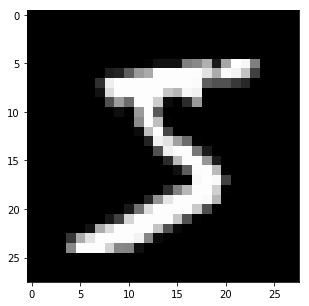

None


In [ ]:
plt.figure(figsize: [5,5])
plt.show(plt.imshow(X: img, cmap: "gray"))

### How does this work?

Python is a dynamically typed language ... but another way to look at it is that it has exactly one static type.  Swift calls it `PythonObject`.

In [ ]:
print("NumPy Module Type: ", type(of: np))
print("NumPy Function Type: ", type(of: np.array))
print("NumPy Array Type: ", type(of: npArray))
print(npArray*2, npArray[1])

print(Python.type(npArray))
print(npArray.__class__)

NumPy Module Type:  PythonObject
NumPy Function Type:  PythonObject
NumPy Array Type:  PythonObject
[2 4 6 8] 2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


This works really well in practice, because Swift is talking to Python dynamically - exactly as it was designed to be used.  You can even import and use the entire [fastai PyTorch framework and use it from Swift](https://github.com/Omarsf/swiftTransit/blob/master/SwiftWrappedLesson1Preliminary.ipynb)!

# "Impractical" Programming Languages

We now have a bit of a grasp on how Swift basics work, but we're taking a lot for granted here!  We are supposed to be building an entire machine learning framework from scratch!

Jeremy started by showing you how to implement a MatMul using an array of floating point scalars, "from the foundations".  Apparently, Jeremy thinks this is the foundations:

```python
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c
```

Let's do it properly, this time... by going down to the bedrock.  First let's talk more about what programming languages are, how compilers work, and then we can understand what Swift really is.

**Slides**: [What is a Compiler](https://docs.google.com/presentation/d/1dc6o2o-uYGnJeCeyvgsgyk05dBMneArxdICW5vF75oU/edit#slide=id.g5674d3ead7_0_83)


## Building Float

Ok, now we know how to build Float, Double, Int, etc.  One really nice thing is that this generates really great code.

In [ ]:
// Really simple math
func squareAdd(n: Float) -> Float {
    let tmp = n * n
    let result = tmp + 1.0
    return result
}

You can see the generated X86 assembly the [Compiler Explorer](https://godbolt.org/z/Xns8IA)!  It is optimal, and exactly what you get from the Clang C compiler, because it is built on top of the same LLVM code generator.

Because `Int` and `Float` are implemented in the standard library, you can actually see the underlying field if you know where to look:

In [ ]:
var someInt = 42
print(type(of: someInt._value))
print(type(of: π._value))


Builtin.Int64
Builtin.FPIEEE32


That said you can't do anything useful with it - only the Swift standard library gets to use the functionality defined in the Builtin module. It is a private interface between the standard library and the compiler, and the stdlib reexports all of its functionality.

In [ ]:
import Builtin

: 

A cool thing is that since these things are normal types, you can add your own operators and methods to them, just like you can with any other type:

In [ ]:
extension Int {
  var isOdd : Bool { return self & 1 != 0 }
}

extension Bool {
  var symbol : String { return self ? "👍" : "👎" }
}


String literals can be multi-line, and also support interpolation with `\()`.

In [ ]:
print("""
      Feeling odd?
        Lets check  4: \(     4.isOdd         )
        what about 17: \(    17.isOdd         )
        Lets check  4: \(     4.isOdd.symbol  )
        What about 17: \(    17.isOdd.symbol  )
      """)

Feeling odd?
  Lets check  4: false
  what about 17: true
  Lets check  4: 👎
  What about 17: 👍


A lot of the Swift "language" is implemented in the standard library, including primitive types like `Bool` as well.  Check out how short circuiting `&&` and `||` operators are [implemented right in the standard library](https://github.com/apple/swift/blob/master/stdlib/public/core/Bool.swift#L245).  Even primitives like `assert` are just [functions implemented in Swift](https://github.com/apple/swift/blob/master/stdlib/public/core/Assert.swift#L13).


```swift
  public static func && (lhs: Bool, rhs: @autoclosure () -> Bool) -> Bool {
    return lhs ? rhs() : false
  }
```

## Looking inside Array

Of course, `Array` and `String` are also written in Swift and provided by the standard library.  Array in Swift contains a pointer to the elements and a size and a reserved capacity.  Let's try it out to see how it works.

Arrays work with type inference:

In [ ]:
var myArray = [1,2,3,4,5,6]

You can write array types with `[]` syntax, which is what most people do...

In [ ]:
var myArray2 : [Int] = myArray

But this is just synactic sugar for the `Array` type.

In [ ]:
var myArray3 : Array<Int> = myArray

You can see that all of these have the exact same type, even though they are written in different ways:

In [ ]:
print(type(of: myArray), type(of: myArray2), type(of: myArray3))

Array<Int> Array<Int> Array<Int>


Swift arrays support all the normal stuff you'd expect, like iteration, indexing, slicing etc. 

Here is a standard `for` loop:

In [ ]:
// Standard `for` loop
for x in myArray {
    print(x)
}

1
2
3
4
5
6


You index or slice with brackets. The Swift slicing operators are `...` for inclusive (including the endpoint) and `..<` for exclusive ranges.  You'll see `..<` the most often:

In [ ]:
print("element:", myArray[0])
print("slice:  ", myArray[1...3])  // inclusive - includes "3"
print("slice:  ", myArray[1..<3])  // exclusive

element: 1
slice:   [2, 3, 4]
slice:   [2, 3]


`map` applies a function (closure) to every element in the array. Swift closures are like Python lambda's. You can name the argument to the lambda if you'd like:

In [ ]:
print("mapped:   ", myArray.map({ arg in arg + 10 }))

mapped:    [11, 12, 13, 14, 15, 16]


Arguments can also be anonymous, and default to `$0`, `$1`, `$2`, which are nice for concise functional algorithms. 

`filter` returns an array with the elements for which the function returns `true`

In [ ]:
print("filtered: ", myArray.filter({ $0.isOdd }))

filtered:  [1, 3, 5]


Functions with trailing closures can omit the parens or move the closure after the parens, which allows you to write nice and fluent code:

In [ ]:
print("oddity:   ", myArray.map{ $0.isOdd.symbol })
print("processed:", myArray.map{ $0*3 }.filter{ $0.isOdd })

oddity:    ["👍", "👎", "👍", "👎", "👍", "👎"]
processed: [3, 9, 15]


`map` and `filter` are extremely important functions that we never use in Python because they are inefficient, so you'll have to learn to use them in Swift. The last important function is `reduce` that will compute a value from your array by going from an initial value and applying an operator:

In [ ]:
print("sum: ", myArray.reduce(0, +))

sum:  21


Since `Array` is a type like any other, of course you can put your own methods on it with an extension:

In [ ]:
extension Array where Element : Numeric {
    func doubleElements() -> Array {
        return self.map { $0 * 2 }
    }
}

print([1,2,3].doubleElements())

[2, 4, 6]


You might be wondering what the `where Element : Numeric` thing is on that extension.  That is saying that the `doubleElements` method only exists on arrays whose elements are numeric.  Other sorts of arrays don't get this method because they can't multiply the elements by two.  For example, try it out on an array of strings or bool (which aren't considered to be numeric) to see what happens:

In [ ]:
print([true, false, true].doubleElements())

: 

If you are curious about `Array` please dive [into the code in the standard library](https://github.com/apple/swift/blob/master/stdlib/public/core/Array.swift#L300).  It is all written in Swift, but uses somewhat more advanced features than we've introduced so far.  For example, you can see how it [implements subscripting of an element](https://github.com/apple/swift/blob/master/stdlib/public/core/Array.swift#L677).

If you're interested in diving into other things, [`Dictionary`](https://github.com/apple/swift/blob/tensorflow/stdlib/public/core/Dictionary.swift#L13) and [`Set`](https://github.com/apple/swift/blob/tensorflow/stdlib/public/core/Set.swift#L13) are also interesting and have some massive doc comments explaining how they work.


Now that we have seen how Float and Arrays are defined, we're allowed to use them - so we can define a matmul!  Onward to [01_matmul](https://github.com/fastai/fastai_docs/tree/master/dev_swift).